<a href="https://www.kaggle.com/code/codewithdark/simple-ann-on-fmnist-small-data?scriptVersionId=214600339" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
from matplotlib import pyplot as plt

In [2]:
torch.manual_seed(42)

In [3]:
df = pd.read_csv('/kaggle/input/fmnist-small/fmnist_small.csv')

In [4]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


In [5]:
df.shape

(6000, 785)

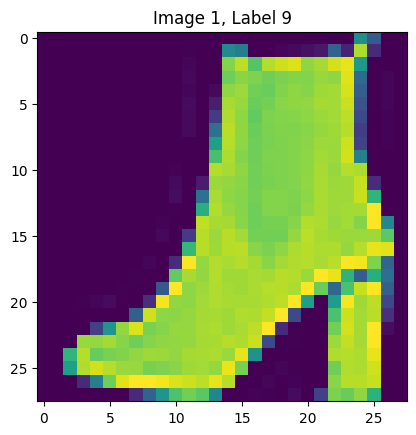

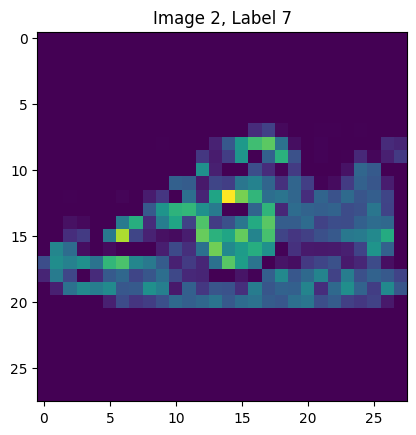

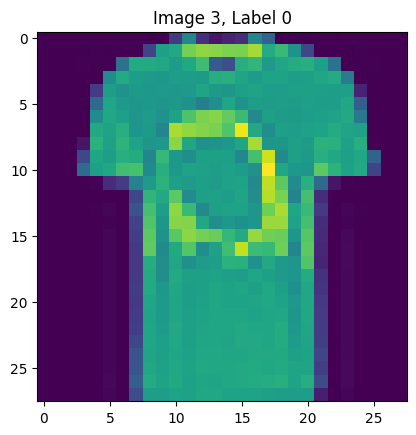

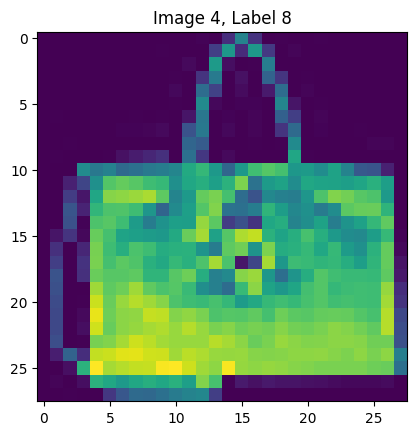

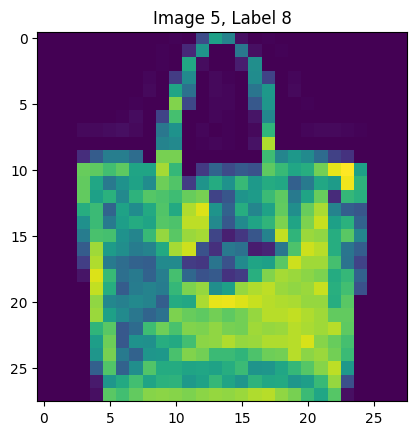

In [6]:
# prompt: plot the some image from dataset

import numpy as np
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has a column named 'image'
# representing the image data in a format that can be visualized.
# If the image data is stored as a string, you might need to convert it to a NumPy array

# Example assuming 'image' is already in a suitable format (e.g., a list of pixels):
for i in range(5):
  image_data = np.array(df.iloc[i, 1:]).reshape(28,28)
  plt.imshow(image_data)
  plt.title(f'Image {i+1}, Label {df.iloc[i, 0]}')
  plt.show()


In [7]:
x = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
# prompt: normalize the data from 0 to 1

X_train = X_train/255.0
X_test = X_test/255.0


In [10]:
class customDataset(Dataset):
  def __init__(self, x, y):
    self.x = torch.tensor(x.values, dtype=torch.float32)
    self.y = torch.tensor(y.values, dtype=torch.long)

  def __len__(self):
    return len(self.x)

  def __getitem__(self, idx):
    return self.x[idx], self.y[idx]

In [11]:
# train and test dataset creation

train_dataset = customDataset(X_train, y_train)
test_dataset = customDataset(X_test, y_test)

In [12]:
len(train_dataset)

4800

In [13]:
train_dataset[1]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0039, 0.0000, 0.0000, 0.3843, 0.3765, 0.3922, 0.3804, 0.3176, 0.0000,
         0.0000, 0.0078, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0039,
         0.0000, 0.0000, 0.0000, 0.0275, 0.8627, 0.7059, 0.6196, 0.6471, 0.8157,
         0.0275, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000,
         0.0000, 0.0000, 0.0275, 0.3529, 0.7098, 0.5529, 0.7137, 0.8980, 0.7137,
         0.6471, 0.7765, 0.4353, 0.1608, 0.0000, 0.0000, 0.0000, 0.0039, 0.0039,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.3137, 0.5804, 0.7098, 0.7059, 0.5922, 0.5882, 0.5490, 0.7647,
         0.5765, 0.6588, 0.6157, 0.6863, 0.7686, 0.6588, 0.4196, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [14]:
# train and test dataloader

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [15]:
# def NN model

class NeuralNetwork(nn.Module):
      def __init__(self, num_feature):
          super().__init__()
          self.model = nn.Sequential(
              nn.Linear(num_feature, 128),
              nn.ReLU(),
              nn.Linear(128, 64),
              nn.ReLU(),
              nn.Linear(64, 10)
          )

      def forward(self, x):
          return self.model(x)




In [16]:
epochs = 100
learning_rate = 0.1

In [17]:
# object instantiation
model = NeuralNetwork(X_train.shape[1])

# loss function
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [18]:
#training loop

for epoch in range(epochs):

    total_loss = 0.0
    for batch_features, batch_labels in train_loader:

        # forward pass
        outputs = model(batch_features)
        # loss calculation
        loss = criterion(outputs, batch_labels)

        optimizer.zero_grad()
        # backward pass
        loss.backward()
        # weight update
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    print(f"Epoch: {epoch+1}, Loss: {avg_loss:.4f}")

Epoch: 1, Loss: 1.3216
Epoch: 2, Loss: 0.7793
Epoch: 3, Loss: 0.6428
Epoch: 4, Loss: 0.5752
Epoch: 5, Loss: 0.5282
Epoch: 6, Loss: 0.4953
Epoch: 7, Loss: 0.4602
Epoch: 8, Loss: 0.4355
Epoch: 9, Loss: 0.4186
Epoch: 10, Loss: 0.3991
Epoch: 11, Loss: 0.3853
Epoch: 12, Loss: 0.3729
Epoch: 13, Loss: 0.3498
Epoch: 14, Loss: 0.3479
Epoch: 15, Loss: 0.3160
Epoch: 16, Loss: 0.3119
Epoch: 17, Loss: 0.2937
Epoch: 18, Loss: 0.2892
Epoch: 19, Loss: 0.2741
Epoch: 20, Loss: 0.2639
Epoch: 21, Loss: 0.2655
Epoch: 22, Loss: 0.2413
Epoch: 23, Loss: 0.2416
Epoch: 24, Loss: 0.2221
Epoch: 25, Loss: 0.2276
Epoch: 26, Loss: 0.2087
Epoch: 27, Loss: 0.2178
Epoch: 28, Loss: 0.2084
Epoch: 29, Loss: 0.1845
Epoch: 30, Loss: 0.1867
Epoch: 31, Loss: 0.1885
Epoch: 32, Loss: 0.1902
Epoch: 33, Loss: 0.1753
Epoch: 34, Loss: 0.1797
Epoch: 35, Loss: 0.1676
Epoch: 36, Loss: 0.1725
Epoch: 37, Loss: 0.1507
Epoch: 38, Loss: 0.1493
Epoch: 39, Loss: 0.1437
Epoch: 40, Loss: 0.1347
Epoch: 41, Loss: 0.1342
Epoch: 42, Loss: 0.1344
E

In [19]:
model.eval()

NeuralNetwork(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [20]:
total = 0
correct = 0

with torch.no_grad():
  for batch_features, batch_labels in test_loader:
    outputs = model(batch_features)
    _, predicted = torch.max(outputs.data, 1)
    total += batch_labels.size(0)
    correct += (predicted == batch_labels).sum().item()

accuracy = correct / total
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.8242
